# Comparaison de la complexité d'algorithmes de tri
### Cedric Chauve, cedric.chauve@u-bordeaux.fr
### 16 mai 2019

Dans ce calepin, on va lancer des algoritmes de tri sur des listes d'entiers tirées aléatoirement et examiner la complexité de différents algorithmes pour essayer de deviner la complexité asymptotique et en moyenne.

In [9]:
import random as random
import matplotlib.pyplot as plt
import pandas as pd

from tris import *

## Génération aléatoire de collections à trier

Le but de cette partie est de générer des collections aléatoires de 10 à 1000 éléments. Pour chaque taille *n* (n=10, 20, 30, ..., 990, 1000) on tire 99 collections aléatoires de nombres compris entre 1 et 1000, auxquelles on ajoute la collection des entiers de 1 à $n$ en ordre inversée (n, n-1, n-2, ..., 2,1), supposée être la collection la plus difficile à trier.

Le résultat est une collection INPUT telles que INPUT[n][k] est la *k*ème collection de taille $n$, avec la convention que INPUT[n][100] est la collection renversée.

In [11]:
# Génération de données

N_MAX          = 20
LISTE_N        = [n*10 for n in range(1,N_MAX+1)] # Liste des tailles des collections à trier
NB_COLLECTIONS = 100  # Pour chaque taille on génère 100 collections (99 aléatoires)
NB_MAX         = 1000 # Valeur max d'un nombre dans une collection

def creer_collection(n):
    return([random.randint(1,NB_MAX) for i in range(n)])

def creer_id_renversee(n):
    return([n-i for i in range(n)])

INPUT = {n: {k: creer_collection(n) for k in range(1,NB_COLLECTIONS)} for n in LISTE_N}
for n in INPUT.keys():
    INPUT[n][NB_COLLECTIONS] = creer_id_renversee(n)

## Tris

On va étudier 4 tris : le tri par insertion, le tri bulle, le tri par fusion et le tri par tas. Ces tris sont implémentés dans les fichiers python *insertion_sort.py*, *bubble_sort.py*, *merge_sort.py* et *heap_sort.py*.

Pour chaque tri, l'implémentation retourne la collection triée, aisni que le nombre d'étapes de calcul élémentaires effectuées par l'algorithme de tri, où une étape élémentaire est définie comme suit :
- nombre de décalages d'éléments dans la collection durant une insertion, pour le tri par insertion;
- nombre de comparaisons entre deux éléments consécutifs, pour le tri bulles;
- nombre de comparaisons entre éléments des deux sous-collections à fusionner, incluant comparaison avec une liste vide, pour le tri par fusion;
- nombre de comparaisons entre deux éléments, pour le tri par tas.

On va lancer les 4 tris sur les collections enregistrées dans *INPUT*, enregistrer dans une collection *COMPLEXITE* le résultat, de sorte que *COMPLEXITE[T][n][k]* contient le nombre d'étapes de calcul élémentaires effectuées par le tri *T* sur la *k*ème collection de taille *n*.

In [13]:
# Dictionnaire des algorithmes de tri
LISTE_TRIS = {'insertion': triInsertion, 'bulles': triBulle, 'fusion': triFusion, 'selection': triSelection}
# Complexités observées expérimentalement
COMPLEXITE = {tri: {n: {} for n in LISTE_N} for tri in LISTE_TRIS.keys()}

for n in LISTE_N:
    for k in INPUT[n].keys():
        for tri in LISTE_TRIS.keys():
            # On recopie la collection à trier car les algorithmes de tri modifient la collection initiale
            unsorted_collection = INPUT[n][k][:] 
            # On trie
            nb_steps = LISTE_TRIS[tri](unsorted_collection)
            COMPLEXITE[tri][n][k] = nb_steps
# Création d'une data frame pandas
DF_COMPLEXITE = pd.DataFrame.from_dict(COMPLEXITE)

On graphe maintenant la distribution de la complexité mesurée pour chacun des 4 algorithmes de tri. Pour chaque algorithme, on montre une <a href="https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches">boîte à moustache</a> qui décrit la **distribution** des complexités mesurées.

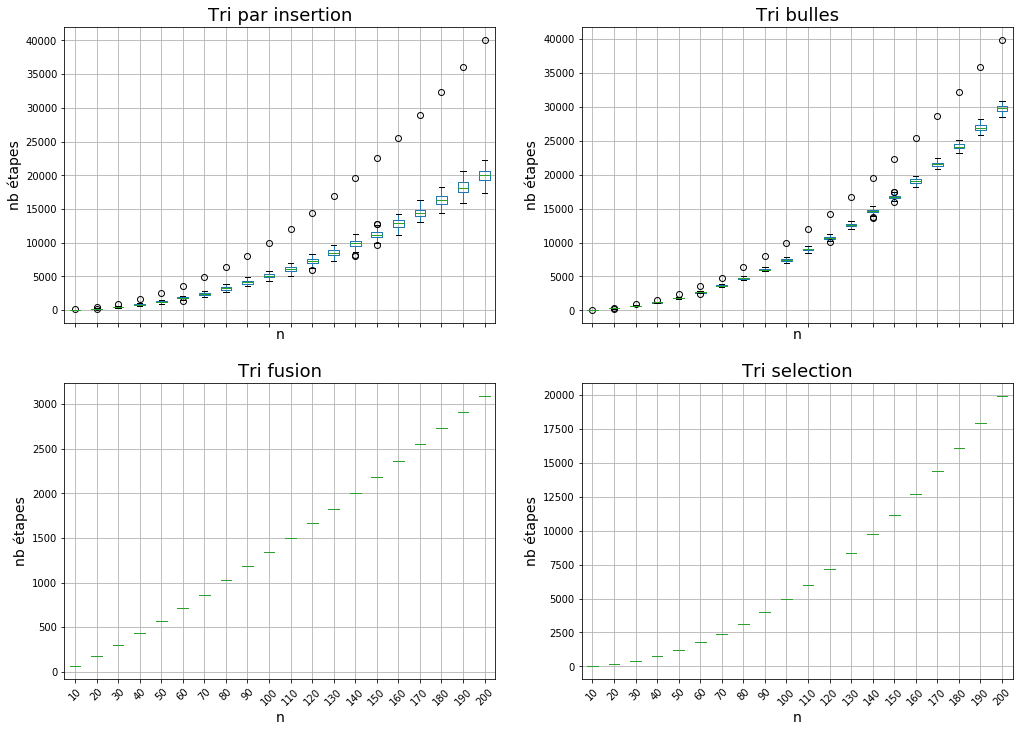

In [14]:
fig1, ax1 = plt.subplots(2,2,figsize=(17,12), sharex=True)
TITLE_FONT = 18
LABEL_FONT = 14
X_ROT      = 45

for ax in ax1.flat:
    ax.set_xlabel('n', fontsize=LABEL_FONT)
    ax.set_ylabel('nb étapes', fontsize=LABEL_FONT)

DF_COMPLEXITE['insertion'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[0,0])
ax1[0,0].set_title('Tri par insertion', fontsize=TITLE_FONT)

DF_COMPLEXITE['bulles'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[0,1])
ax1[0,1].set_title('Tri bulles', fontsize=TITLE_FONT)

DF_COMPLEXITE['fusion'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[1,0])
ax1[1,0].set_title('Tri fusion', fontsize=TITLE_FONT)

DF_COMPLEXITE['selection'].apply(lambda x: pd.Series(x)).T.boxplot(rot=X_ROT, ax=ax1[1,1])
ax1[1,1].set_title('Tri selection', fontsize=TITLE_FONT)

plt.show()